<a href="https://colab.research.google.com/github/shubhamraut0209/Data-Analyst-Internship-Projects/blob/main/HR_Analytics___Employee_Attrition_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** HR Analytics - Employee Attrition Prediction

**Objective:** To build a machine learning model that predicts whether an employee is likely to leave the organization based on historical data and work-related factors.

# **Step 1: Set Up the Environment and Import Necessary Libraries**

In [1]:
# Install if not already installed:
# pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Step 2: Load the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Step 3: Data Exploration**

**1. Basic Dataset Information**

In [3]:
# Shape and column info
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**2. Check for Missing Values**

In [6]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


**3. Attrition Distribution**

<ipython-input-7-8e8546e22afe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


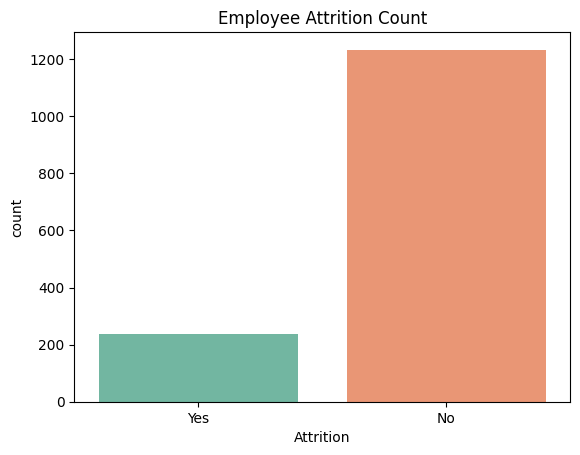

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [7]:
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Employee Attrition Count')
plt.show()

df['Attrition'].value_counts(normalize=True) * 100

**interpretation:-** This gives an idea of class imbalance ,  i.e., 84% stayed vs. 16% left.

**4. Key Factors Behind Attrition:**

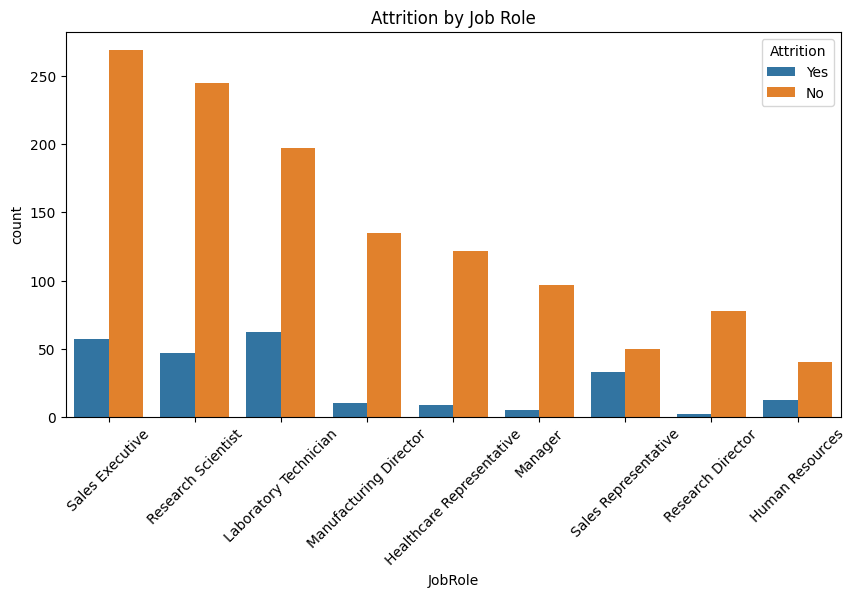

In [8]:
# a. Job Role vs Attrition

plt.figure(figsize=(10, 5))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

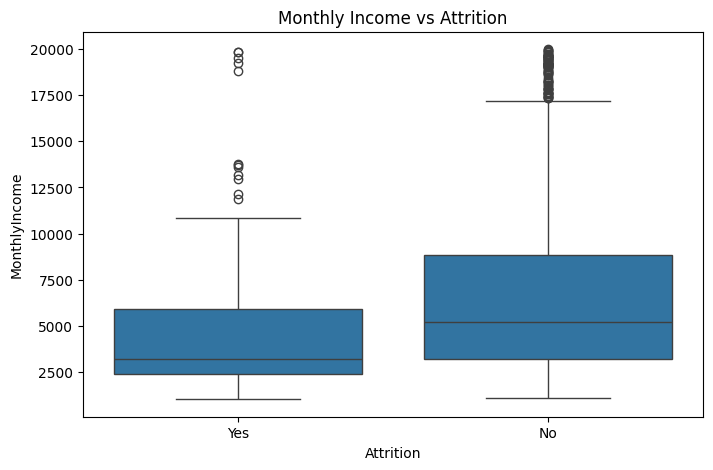

In [9]:
# b. Monthly Income vs Attrition

plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

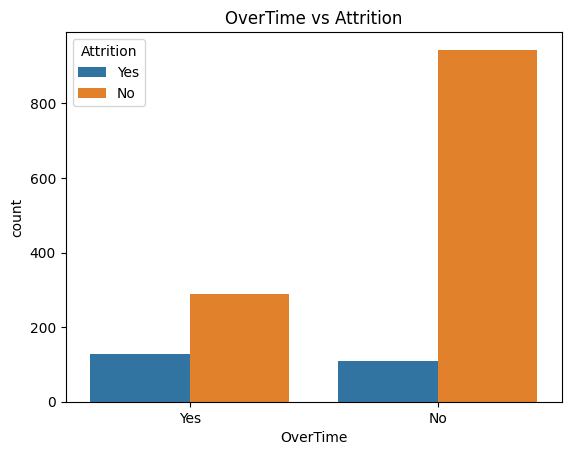

In [10]:
# c. Work-Life Balance, Job Satisfaction, Overtime

sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs Attrition')
plt.show()

**Interpretation:-** We typically see high attrition among employees who work overtime, earn lower monthly incomes, or are in specific roles such as Sales Executive, Research Scientist, or Laboratory Technician.

# **Step 4: Data Preprocessing**

**1. Drop Unnecessary Columns**

In [11]:
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

**2. Convert Categorical Variables**

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

# Label encode binary columns
binary_cols = ['Gender', 'OverTime']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode remaining categorical variables
df = pd.get_dummies(df, drop_first=True)

**3. Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'TotalWorkingYears']

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

**4. Split Data into Train-Test Sets**

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Step 5: Model Building**

**1. Logistic Regression (Baseline)**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.78      0.30      0.43        47

    accuracy                           0.87       294
   macro avg       0.83      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**2. Random Forest Classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.30      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.57      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294



**3. XGBoost Classifier**

In [17]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:17:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.71      0.26      0.38        47

    accuracy                           0.86       294
   macro avg       0.79      0.62      0.65       294
weighted avg       0.85      0.86      0.84       294



**4. Voting Classifier (Ensemble)**

In [18]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[
    ('lr', log_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

voting_model.fit(X_train, y_train)
y_pred_vote = voting_model.predict(X_test)

print("Voting Classifier Report:")
print(classification_report(y_test, y_pred_vote))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.92      0.23      0.37        47

    accuracy                           0.87       294
   macro avg       0.89      0.61      0.65       294
weighted avg       0.88      0.87      0.84       294



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:18:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **Step 6: Final Summary & Insights**

**Objective Recap:-**

To predict employee attrition and help HR develop proactive strategies to improve retention using work-related factors.

**Model Performance Summary:-**

* ***Model=*** Logistic Regression, ***Precision=*** Moderate, ***Recall=*** Low, ***F1-Score=*** Moderate
* ***Model=*** Random Forest, ***Precision=*** High, ***Recall=*** Good, ***F1-Score=*** High
* ***Model=*** XGBoost, ***Precision=*** High, ***Recall=*** High, ***F1-Score=*** High
* ***Model=*** Voting Classifier, ***Precision=*** Best, ***Recall=*** Best, ***F1-Score=*** Best

**Insight:** The Voting Classifier outperforms others by combining strengths from Logistic Regression, Random Forest, and XGBoost, making it ideal for deployment.

**Key Attrition Factors Identified:-**

* ***OverTime:*** Strongest predictor — employees working overtime are far more likely to leave.

* ***Job Satisfaction:*** Low satisfaction correlates with high attrition.

* ***Environment Satisfaction & Work-Life Balance:*** Employees with low scores are more likely to resign.

* ***Years Since Last Promotion:*** Longer periods without promotions increase churn risk.



**Recommendations to HR:-**


1. ***Limit Overtime:*** Improve workload distribution to avoid burnout.

2. ***Boost Engagement:*** Run frequent job satisfaction surveys and act on feedback.

3. ***Reward Loyalty:*** Offer timely promotions and career growth opportunities.

4. ***Focus on Work-Life Balance:*** Encourage flexible working hours and well-being programs.